In [23]:
import matplotlib.pyplot as plt
import xarray as xr

from salishsea_tools import viz_tools, geo_tools

%matplotlib inline

In [29]:
bathyfile = '../../../grid/bathymetry_201702.nc'
meshfile = '../../../grid/mesh_mask201702.nc'

In [30]:
bathy = xr.open_dataset(bathyfile)
mesh = xr.open_dataset(meshfile)
mask = 1 - mesh.tmask[0, 0]

In [33]:
mesh

<xarray.Dataset>
Dimensions:       (t: 1, x: 398, y: 898, z: 40)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    time_counter  (t) datetime64[ns] ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    fmask         (t, z, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
    glamt         (t, y, x) float32 ...
    glamu         (t, y, x) float32 ...
    glamv         (t, y, x) float32 ...
    glamf         (t, y, x) float32 ...
    gphit         (t, y, x) float32 ...
    gphiu         (t, y, x) float32 ...
    gphiv         (t, y, x) float32 ...
    gphif         (t, y, x) float32 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    e1f           (t, y, x) float64 ...
    e2t           (t, y, x) float64 ...
    e2u           (t, y, x) float64 ...
    e2v           (t, y, x) float64 ...
    e2f           (t, y, x) float64 ...
    ff            (t, y, x) float64 ...
    mbathy        (t, y, x) int16 ...
    misf          (t, y, x) int16 ...
    isfdraft      (t, y, x) float32 ...
    e3t_0         (t, z, y, x) float64 ...
    e3u_0         (t, z, y, x) float64 ...
    e3v_0         (t, z, y, x) float64 ...
    e3w_0         (t, z, y, x) float64 ...
    gdept_0       (t, z, y, x) float32 ...
    gdepu         (t, z, y, x) float32 ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    DOMAIN_number_total:     1
    DOMAIN_number:           0
    DOMAIN_dimensions_ids:   [1 2]
    DOMAIN_size_global:      [398 898]
    DOMAIN_size_local:       [398 898]
    DOMAIN_position_first:   [1 1]
    DOMAIN_position_last:    [398 898]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX
    file_name:               NEMO-forcing/grid/mesh_mask201702.nc
    TimeStamp:               14/03/2019 15:00:00 -0700
    Conventions:             CF-1.6
    title:                   Salish Sea NEMO bathymetry_201702 Bathymetry Mes...
    institution:             Dept of Earth, Ocean & Atmospheric Sciences, Uni...
    source:                  NEMO-3.6 Salish Sea configuration
    references:              https://salishsea.eos.ubc.ca/erddap/info/\nhttps...
    history:                 [2019-03-14 15:00] ncks -4 -L4 -O mesh_mask.nc m...

In [293]:
myrivers1a = {'Serpentine': [49.082, -122.853, 392, 354],
            'Nicomekl': [49.063, -122.876, 388, 350],
            'LittleCampbell': [49.014, -122.779, 373, 357], 
            'Colebrook': [49.083, -122.913, 395, 346],}
myrivers1b = {
            'Jericho': [49.276, -123.203, 453, 329, 13.3],
            'FalseCreek': [49.276, -123.139, 450, 337, 27.17],
            'FirtNarrows': [49.31, -123.097, 459, 343, 23.16 + 20.66 + 10.38 + 10.24 +
                           93.71 + 195.12 + 342.65]}

In [294]:
sumit = 0
for river in myrivers1b:
    sumit = sumit + myrivers1b[river][4]
print (sumit)

736.39


Jericho 454 329
FalseCreek 450 337
FirtNarrows 457 343


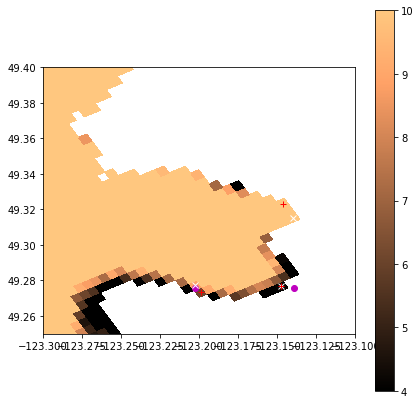

In [297]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
colours = ax.pcolormesh(mesh.glamf[0], mesh.gphif[0], bathy.Bathymetry[1:, 1:], vmax=10, cmap='copper')
ax.set_xlim(-123.3, -123.1)
ax.set_ylim(49.25, 49.4)
viz_tools.set_aspect(ax, coords='map')
fig.colorbar(colours);
for river in myrivers1b:
    plt.plot(myrivers1b[river][1], myrivers1b[river][0], 'mo')
    yy, xx = geo_tools.find_closest_model_point(myrivers1b[river][1], myrivers1b[river][0], 
                                              bathy.nav_lon[:], bathy.nav_lat[:], land_mask=mask)
    print (river, yy, xx)
    plt.plot(bathy.nav_lon[yy, xx], bathy.nav_lat[yy, xx], 'wx')
    plt.plot(bathy.nav_lon[myrivers1b[river][2], myrivers1b[river][3]],
            bathy.nav_lat[myrivers1b[river][2], myrivers1b[river][3]], 'r+')

In [257]:
myrivers2 = {'Capilano': [49.320, -123.14, 458, 343, 49.370],
            'Lawson': [49.328, -123.162, 461, 341, 3.21+3.96],
            'Marr': [49.333, -123.185, 464, 338, 6.34],
            'Rodgers': [49.336, -123.196, 465, 337, 0.33*7.28],
            'RodgersB': [49.339, -123.205, 466, 337, 0.34*7.28],
            'Westmount': [49.340, -123.212, 467, 336, 0.33*7.28],
            'Cypress': [49.339, -123.241, 469, 331, 15.91],
            'Eagle': [49.357, -123.27, 474, 329, 9.84],
            'Whyte': [49.382, -123.265, 478, 332, 5.82],
            'Disbrow': [49.399, -123.25, 481, 337, 2.97],
            'Sclufield': [49.407, -123.244, 482, 339, 2.41],
             'Turpin': [49.426, -123.233, 485, 343, 7.62],
             'Harvey': [49.460, -123.24, 492, 346, 20.91],
             'Deeks': [49.502, -123.25, 501, 350, 17.42],
             'Kallahn': [49.549, -123.24, 510, 358, 13.36],
             'Furry': [49.582, -123.226, 515, 364, 66.38],
             'Britannia': [49.627, -123.207, 523, 373, 34.37],
             'Gonzalos': [49.661, -123.177, 527, 381, 15.00],
             'Shannon': [49.678, -123.16, 529, 386, 17.94], 
             'Stawanus': [49.683, -123.16, 530, 387, 57.76]
            }

In [258]:
sumit = 0
for river in myrivers2:
    sumit = sumit + myrivers2[river][4]
print (sumit)

357.87


Capilano 458 343
Lawson 461 341
Marr 464 338
Rodgers 465 337
RodgersB 466 336
Westmount 467 335
Cypress 469 331
Eagle 474 329
Whyte 479 333
Disbrow 481 337
Sclufield 482 339
Turpin 485 343
Harvey 492 346
Deeks 501 350
Kallahn 510 358
Furry 515 364
Britannia 523 373
Gonzalos 527 381
Shannon 529 386
Stawanus 530 387


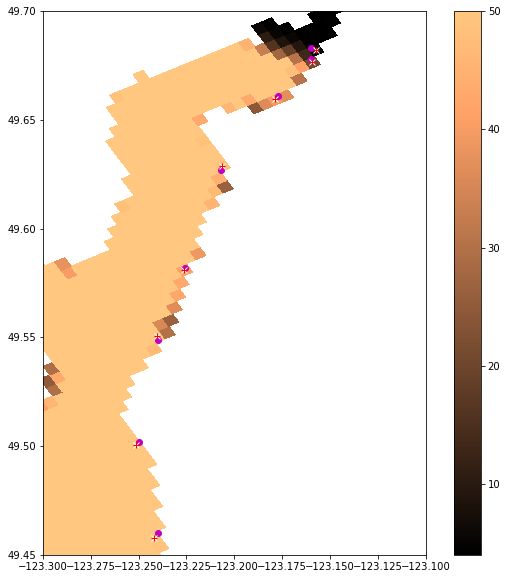

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colours = ax.pcolormesh(mesh.glamf[0], mesh.gphif[0], bathy.Bathymetry[1:, 1:], 
                        vmax=50, cmap='copper')
ax.set_xlim(-123.3, -123.1)
ax.set_ylim(49.45, 49.7)
viz_tools.set_aspect(ax, coords='map')
fig.colorbar(colours);
for river in myrivers2:
    plt.plot(myrivers2[river][1], myrivers2[river][0], 'mo')
    yy, xx = geo_tools.find_closest_model_point(myrivers2[river][1], myrivers2[river][0], 
                                              bathy.nav_lon[:], bathy.nav_lat[:], land_mask=mask)
    print (river, yy, xx)
    plt.plot(bathy.nav_lon[yy, xx], bathy.nav_lat[yy, xx], 'wx')
    plt.plot(bathy.nav_lon[myrivers2[river][2], myrivers2[river][3]],
            bathy.nav_lat[myrivers2[river][2], myrivers2[river][3]], 'r+')

In [259]:
myrivers3 = {'WoodfibreB': [49.666, -123.253, 533, 371, 47.7],
            'Woodfibre': [49.661, -123.254, 533, 37, 25.26], 
            'Foulger': [49.645, -123.261, 530, 367, 17.28],
            'Ellesmere': [49.597, -123.262, 521, 361, 15.34], 
            'Potlatch': [49.581, -123.317, 522, 350, 34.94], 
            'McNab': [49.562, -123.384, 522, 338, 72.7],
            'Bain': [49.539, -123.447, 522, 326, 13.34],
            'Rainy': [49.523, -123.483, 522, 319, 71.31],
            'McNair': [49.510, -123.493, 520, 316, 54.03], 
            'Twin': [49.480, -123.485, 513, 313, 19.56],
            'Langdale': [49.434, -123.472, 504, 309, 26.92]}

In [260]:
sumit = 0
for river in myrivers3:
    sumit = sumit + myrivers3[river][4]
print (sumit)

398.38


WoodfibreB 533 371
Woodfibre 533 370
Foulger 530 367
Ellesmere 521 361
Potlatch 521 351
McNab 522 338
Bain 522 326
Rainy 522 319
McNair 520 316
Twin 513 313
Langdale 504 309


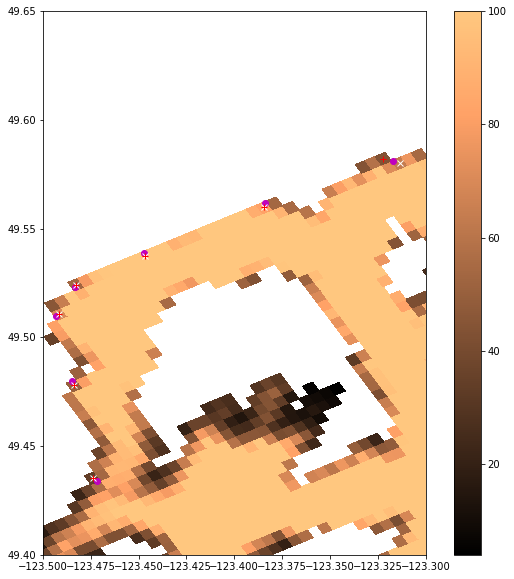

In [198]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colours = ax.pcolormesh(mesh.glamf[0], mesh.gphif[0], bathy.Bathymetry[1:, 1:], 
                        vmax=100, cmap='copper')
ax.set_xlim(-123.5, -123.3)
ax.set_ylim(49.4, 49.65)
viz_tools.set_aspect(ax, coords='map')
fig.colorbar(colours);
for river in myrivers3:
    plt.plot(myrivers3[river][1], myrivers3[river][0], 'mo')
    yy, xx = geo_tools.find_closest_model_point(myrivers3[river][1], myrivers3[river][0], 
                                              bathy.nav_lon[:], bathy.nav_lat[:], land_mask=mask)
    print (river, yy, xx)
    plt.plot(bathy.nav_lon[yy, xx], bathy.nav_lat[yy, xx], 'wx')
    plt.plot(bathy.nav_lon[myrivers3[river][2], myrivers3[river][3]],
            bathy.nav_lat[myrivers3[river][2], myrivers3[river][3]], 'r+')

In [205]:
prop_dict = {}
ws = 'fraser'
prop_dict[ws] = {}
rivers = myrivers1a
for river in rivers:
    prop_dict[ws][river] = {}
    prop_dict[ws][river]['prop'] = 'entry'
    prop_dict[ws][river]['i'] = rivers[river][2]
    prop_dict[ws][river]['j'] = rivers[river][3]
    prop_dict[ws][river]['di'] = 1
    prop_dict[ws][river]['dj'] = 1
    prop_dict[ws][river]['depth'] = 1
print (prop_dict)

{'fraser': {'Serpentine': {'prop': 'entry', 'i': 392, 'j': 354, 'di': 1, 'dj': 1, 'depth': 1}, 'Nicomekl': {'prop': 'entry', 'i': 388, 'j': 350, 'di': 1, 'dj': 1, 'depth': 1}, 'LittleCampbell': {'prop': 'entry', 'i': 373, 'j': 357, 'di': 1, 'dj': 1, 'depth': 1}, 'Colebrook': {'prop': 'entry', 'i': 395, 'j': 346, 'di': 1, 'dj': 1, 'depth': 1}}}


In [210]:
WRIA1 = 0.016
Nooksack_cor = WRIA1*0.75/2040
areas = 116 + 149 + 60 + 31
Nooksack_cor * areas

0.0020941176470588236

In [211]:
jervis = {'Chapman': {
        'prop': 0.02, 'i': 522, 'j': 273, 'di': 1, 'dj': 1, 'depth': 1,
            },
    'Lapan': {
        'prop': 0.02, 'i': 620, 'j': 283, 'di': 1, 'dj': 1, 'depth': 1,
            },
    'Nelson': {
        'prop': 0.02, 'i': 604, 'j': 262, 'di': 1, 'dj': 1, 'depth': 1,
            },
    'Wakefield': {
        'prop': 0.02, 'i': 534, 'j': 264, 'di': 1, 'dj': 1, 'depth': 1,
            },
    'Halfmoon': {
        'prop': 0.02, 'i': 549, 'j': 254, 'di': 1, 'dj': 1, 'depth': 1,
            },
         }

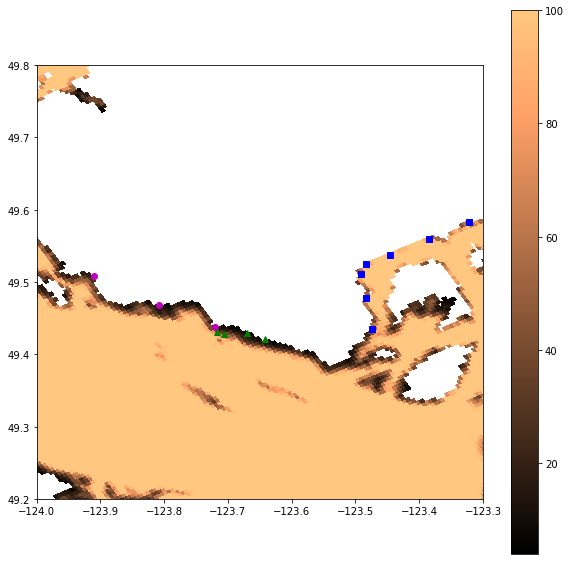

In [225]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colours = ax.pcolormesh(mesh.glamf[0], mesh.gphif[0], bathy.Bathymetry[1:, 1:], 
                        vmax=100, cmap='copper')
ax.set_xlim(-124, -123.3)
ax.set_ylim(49.2, 49.8)
viz_tools.set_aspect(ax, coords='map')
fig.colorbar(colours);
for river in jervis:
    yy, xx = jervis[river]['i'], jervis[river]['j']
    ax.plot(bathy.nav_lon[yy, xx], bathy.nav_lat[yy, xx], 'mo')
for river in myrivers3:
    ax.plot(bathy.nav_lon[myrivers3[river][2], myrivers3[river][3]],
            bathy.nav_lat[myrivers3[river][2], myrivers3[river][3]], 'bs')
# Roberts Creek
Latitude= 49.42123361565936
Longitude= -123.6424594842415    
ax.plot(Longitude, Latitude, 'g^');
# Intermediate Lake
Latitude = 49.429814071504154
Longitude = -123.67000480198539
ax.plot(Longitude, Latitude, 'g^');
# Wilson Creek
Latitude = 49.4284109254669
Longitude = -123.70604446051382
ax.plot(Longitude, Latitude, 'g^');
Latitude = 49.43051226372889
Longitude = -123.71761433845224
ax.plot(Longitude, Latitude, 'g^');

In [261]:
myrivers4 = {'Chester': [49.390, -123.556, 501, 291, 24.58],
            'Roberts': [49.421, -123.642, 512, 282, 48.83],
            'Rume': [49.428, -123.670, 517, 279, 9.17],
#            'Wilson': [49.428, -123.706, 521, 275, 25.83]
            }

In [262]:
sumit = 0
for river in myrivers4:
    sumit = sumit + myrivers4[river][4]
print (sumit)

82.58


Chester 501 291
Roberts 512 282
Rume 516 279
Wilson 519 274


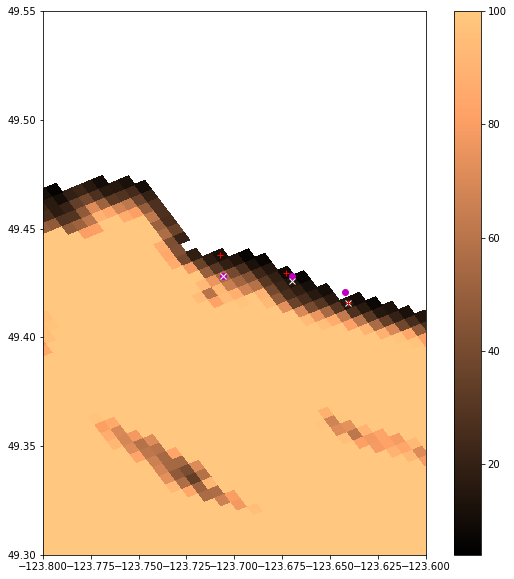

In [241]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colours = ax.pcolormesh(mesh.glamf[0], mesh.gphif[0], bathy.Bathymetry[1:, 1:], 
                        vmax=100, cmap='copper')
ax.set_xlim(-123.8, -123.6)
ax.set_ylim(49.3, 49.55)
viz_tools.set_aspect(ax, coords='map')
fig.colorbar(colours);
for river in myrivers4:
    plt.plot(myrivers4[river][1], myrivers4[river][0], 'mo')
    yy, xx = geo_tools.find_closest_model_point(myrivers4[river][1], myrivers4[river][0], 
                                              bathy.nav_lon[:], bathy.nav_lat[:], land_mask=mask)
    print (river, yy, xx)
    plt.plot(bathy.nav_lon[yy, xx], bathy.nav_lat[yy, xx], 'wx')
    plt.plot(bathy.nav_lon[myrivers4[river][2], myrivers4[river][3]],
            bathy.nav_lat[myrivers4[river][2], myrivers4[river][3]], 'r+')

In [242]:
25.83/5785

0.004464995678478825

In [268]:
TotalHoweNotSquamish = 736.39+357.87+398.38+82.58

In [273]:
TotalHoweNotSquamish

1575.2199999999998

Use 3600 km2 from Clague but that misses some.  Add 200 km2 to give 3800 and a total land part of watershed of 5375.22.

In [274]:
Squamish = 3800
Howe = 5375.22
Squamish/Howe

0.706947808647832

In [288]:
prop_dict = {}
ws = 'howe'
prop_dict[ws] = {}
rivers = myrivers1b
sumit = 0
for river in rivers:
    prop_dict[ws][river] = {}
    prop_dict[ws][river]['prop'] = rivers[river][4]/Howe
    prop_dict[ws][river]['i'] = rivers[river][2]
    prop_dict[ws][river]['j'] = rivers[river][3]
    prop_dict[ws][river]['di'] = 1
    prop_dict[ws][river]['dj'] = 1
    prop_dict[ws][river]['depth'] = 1
    sumit = sumit + rivers[river][4]/Howe

print (prop_dict)
print (sumit)

{'howe': {'Jericho': {'prop': 0.002474317330267412, 'i': 453, 'j': 329, 'di': 1, 'dj': 1, 'depth': 1}, 'FalseCreek': {'prop': 0.005054676831831999, 'i': 450, 'j': 337, 'di': 1, 'dj': 1, 'depth': 1}, 'FirtNarrows': {'prop': 0.1294681892089998, 'i': 457, 'j': 343, 'di': 1, 'dj': 1, 'depth': 1}}}
0.1369971833710992


In [287]:
prop_dict = {}
ws = 'howe'
prop_dict[ws] = {}
rivers = myrivers2
sumit = 0
for river in rivers:
    prop_dict[ws][river] = {}
    prop_dict[ws][river]['prop'] = rivers[river][4]/Howe
    prop_dict[ws][river]['i'] = rivers[river][2]
    prop_dict[ws][river]['j'] = rivers[river][3]
    prop_dict[ws][river]['di'] = 1
    prop_dict[ws][river]['dj'] = 1
    prop_dict[ws][river]['depth'] = 1
    sumit = sumit + rivers[river][4]/Howe

print (prop_dict)
print (sumit)

{'howe': {'Capilano': {'prop': 0.00918474034551144, 'i': 458, 'j': 343, 'di': 1, 'dj': 1, 'depth': 1}, 'Lawson': {'prop': 0.0013338988915802515, 'i': 461, 'j': 341, 'di': 1, 'dj': 1, 'depth': 1}, 'Marr': {'prop': 0.0011794866070598039, 'i': 464, 'j': 338, 'di': 1, 'dj': 1, 'depth': 1}, 'Rodgers': {'prop': 0.00044693984618303996, 'i': 465, 'j': 337, 'di': 1, 'dj': 1, 'depth': 1}, 'RodgersB': {'prop': 0.0004604834778855563, 'i': 466, 'j': 337, 'di': 1, 'dj': 1, 'depth': 1}, 'Westmount': {'prop': 0.00044693984618303996, 'i': 467, 'j': 336, 'di': 1, 'dj': 1, 'depth': 1}, 'Cypress': {'prop': 0.0029598788514702654, 'i': 469, 'j': 331, 'di': 1, 'dj': 1, 'depth': 1}, 'Eagle': {'prop': 0.0018306227466038597, 'i': 474, 'j': 329, 'di': 1, 'dj': 1, 'depth': 1}, 'Whyte': {'prop': 0.0010827463806132587, 'i': 478, 'j': 332, 'di': 1, 'dj': 1, 'depth': 1}, 'Disbrow': {'prop': 0.0005525355241273846, 'i': 481, 'j': 337, 'di': 1, 'dj': 1, 'depth': 1}, 'Sclufield': {'prop': 0.00044835374180033564, 'i': 482

In [281]:
0.00044693984618303996+0.0004604834778855563

0.0009074233240685963

In [286]:
prop_dict = {}
ws = 'howe'
prop_dict[ws] = {}
rivers = myrivers3
sumit = 0
for river in rivers:
    prop_dict[ws][river] = {}
    prop_dict[ws][river]['prop'] = rivers[river][4]/Howe
    prop_dict[ws][river]['i'] = rivers[river][2]
    prop_dict[ws][river]['j'] = rivers[river][3]
    prop_dict[ws][river]['di'] = 1
    prop_dict[ws][river]['dj'] = 1
    prop_dict[ws][river]['depth'] = 1
    sumit = sumit + rivers[river][4]/Howe

print (prop_dict)
print(sumit)

{'howe': {'WoodfibreB': {'prop': 0.00887405538750042, 'i': 533, 'j': 371, 'di': 1, 'dj': 1, 'depth': 1}, 'Woodfibre': {'prop': 0.004699342538537958, 'i': 533, 'j': 37, 'di': 1, 'dj': 1, 'depth': 1}, 'Foulger': {'prop': 0.0032147521403775104, 'i': 530, 'j': 367, 'di': 1, 'dj': 1, 'depth': 1}, 'Ellesmere': {'prop': 0.0028538366801730904, 'i': 521, 'j': 361, 'di': 1, 'dj': 1, 'depth': 1}, 'Potlatch': {'prop': 0.006500199061619803, 'i': 522, 'j': 350, 'di': 1, 'dj': 1, 'depth': 1}, 'McNab': {'prop': 0.013525027812815104, 'i': 522, 'j': 338, 'di': 1, 'dj': 1, 'depth': 1}, 'Bain': {'prop': 0.0024817588861479156, 'i': 522, 'j': 326, 'di': 1, 'dj': 1, 'depth': 1}, 'Rainy': {'prop': 0.013266433745967606, 'i': 522, 'j': 319, 'di': 1, 'dj': 1, 'depth': 1}, 'McNair': {'prop': 0.010051681605590097, 'i': 520, 'j': 316, 'di': 1, 'dj': 1, 'depth': 1}, 'Twin': {'prop': 0.003638920825566209, 'i': 513, 'j': 313, 'di': 1, 'dj': 1, 'depth': 1}, 'Langdale': {'prop': 0.005008167107578853, 'i': 504, 'j': 309,

In [283]:
0.00887405538750042+0.004699342538537958

0.013573397926038377

In [285]:
prop_dict = {}
ws = 'howe'
prop_dict[ws] = {}
rivers = myrivers4
sumit = 0
for river in rivers:
    prop_dict[ws][river] = {}
    prop_dict[ws][river]['prop'] = rivers[river][4]/Howe
    prop_dict[ws][river]['i'] = rivers[river][2]
    prop_dict[ws][river]['j'] = rivers[river][3]
    prop_dict[ws][river]['di'] = 1
    prop_dict[ws][river]['dj'] = 1
    prop_dict[ws][river]['depth'] = 1
    sumit = sumit + rivers[river][4]/Howe
print (prop_dict)
print (sumit)

{'howe': {'Chester': {'prop': 0.004572836088569398, 'i': 501, 'j': 291, 'di': 1, 'dj': 1, 'depth': 1}, 'Roberts': {'prop': 0.009084279341124641, 'i': 512, 'j': 282, 'di': 1, 'dj': 1, 'depth': 1}, 'Rume': {'prop': 0.0017059766856054263, 'i': 517, 'j': 279, 'di': 1, 'dj': 1, 'depth': 1}}}
0.015363092115299464


In [289]:
0.015+0.074+0.067+0.707+0.137

1.0